## Instructies
- Installeer benodigdheden indien nodig: `networkx`, `matplotlib`.
- Draai de code-cellen onder elkaar in dit notebook.


Joshua Meuleman

Datum 18/11/2025

DFS - algoritme 1

In [16]:
# Imports en helpers
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [17]:
# DFS implementatie die discovery/finish tijden, parent-map en traversal-order teruggeeft.
def dfs_from_start(graph, start):
    visited = set()
    discovery = {}
        
    finish = {}
    parent = {}
    order = []
    time = 0

    def visit(u):
        nonlocal time
        visited.add(u)
        time += 1
        discovery[u] = time
        order.append(u)
        # iterate neighbors in deterministic order for reproducibility
        for v in sorted(graph.neighbors(u), key=lambda x: str(x)):
            if v not in visited:
                parent[v] = u
                visit(v)
        time += 1
        finish[u] = time

    parent[start] = None
    visit(start)
    return {
        'order': order,
        'parent': parent,
        'discovery': discovery,
        'finish': finish
    }

# Algemene DFS die door alle componenten loopt (optioneel)
def full_dfs(graph):
    visited = set()
    discovery = {}
    finish = {}
    parent = {}
    order = []
    time = 0
    def visit(u):
        nonlocal time
        visited.add(u)
        time += 1
        discovery[u] = time
        order.append(u)
        for v in sorted(graph.neighbors(u), key=lambda x: str(x)):
            if v not in visited:
                parent[v] = u
                visit(v)
        time += 1
        finish[u] = time
    for node in sorted(graph.nodes(), key=lambda x: str(x)):
        if node not in visited:
            parent[node] = None
            visit(node)
    return {'order': order,'parent': parent,'discovery': discovery,'finish': finish}

## Graph 1 — Complex Directed Graph (met cycli)
We maken een directed graph met meerdere cycli en cross-links. We starten DFS in `A`.

In [18]:
# Constructie Graph 1 (directed)
G1 = nx.DiGraph()
nodes1 = list('ABCDEFGHIJK')
G1.add_nodes_from(nodes1)
edges1 = [
    ('A','B'),('A','C'),
    ('B','D'),('B','E'),
    ('C','F'),
    ('D','H'),
    ('E','G'),
    ('G','D'), # teruglink zorgt voor cycli
    ('H','C'), # teruglink naar C
    ('F','I'),('I','J'),('J','F'), # F-I-J cyclisch
    ('J','K')
]
G1.add_edges_from(edges1)
pos1 = nx.spring_layout(G1, seed=42)

# Run DFS vanaf 'A'
res1 = dfs_from_start(G1, 'A')
print('Traversal order (Graph 1):', res1['order'])
print('Discovery times:', res1['discovery'])
print('Finish times:', res1['finish'])

Traversal order (Graph 1): ['A', 'B', 'D', 'H', 'C', 'F', 'I', 'J', 'K', 'E', 'G']
Discovery times: {'A': 1, 'B': 2, 'D': 3, 'H': 4, 'C': 5, 'F': 6, 'I': 7, 'J': 8, 'K': 9, 'E': 17, 'G': 18}
Finish times: {'K': 10, 'J': 11, 'I': 12, 'F': 13, 'C': 14, 'H': 15, 'D': 16, 'G': 19, 'E': 20, 'B': 21, 'A': 22}


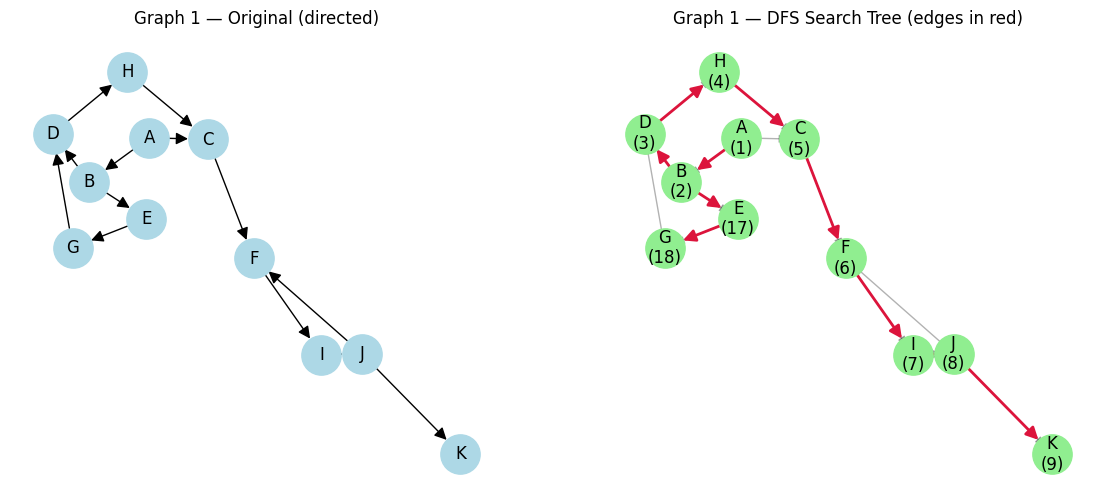

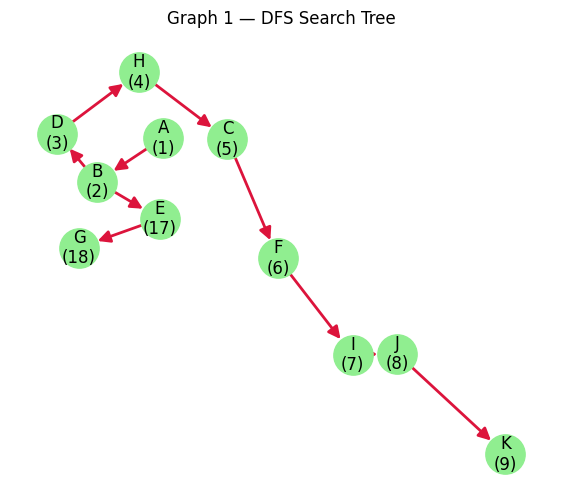

In [19]:
# Maak een DFS tree (edges van parent->child) en plot original + tree
tree1 = nx.DiGraph()
tree1.add_nodes_from(G1.nodes())
for child, par in res1['parent'].items():
    if par is not None:
        tree1.add_edge(par, child)

fig, axes = plt.subplots(1,2, figsize=(14,6))
# Original directed graph
ax = axes[0]
nx.draw(G1, pos1, ax=ax, with_labels=True, node_color='lightblue', arrowsize=18, node_size=800)
ax.set_title('Graph 1 — Original (directed)')
# DFS tree (directed edges followed by DFS)
ax = axes[1]
# color tree edges differently
nx.draw(G1, pos1, ax=ax, with_labels=False, node_color='lightgrey', alpha=0.3, arrowsize=12)
# Draw DFS tree on top without automatic labels to avoid duplication
nx.draw(tree1, pos1, ax=ax, with_labels=False, node_color='lightgreen', arrowsize=18, edge_color='crimson', width=2, node_size=800)
# annotate with discovery times on the DFS tree plot
labels = {n: f'{n}\n({res1["discovery"].get(n, "")})' for n in tree1.nodes()}
nx.draw_networkx_labels(tree1, pos1, labels=labels, ax=ax)
ax.set_title('Graph 1 — DFS Search Tree (edges in red)')
# Save the DFS tree as a PNG (tree-only) to the notebook directory
fig_tree, ax_tree = plt.subplots(figsize=(7,6))
nx.draw(tree1, pos1, ax=ax_tree, with_labels=False, node_color='lightgreen', edge_color='crimson', arrowsize=18, width=2, node_size=800)
labels_tree = {n: f'{n}\n({res1["discovery"].get(n, "")})' for n in tree1.nodes()}
nx.draw_networkx_labels(tree1, pos1, labels=labels_tree, ax=ax_tree)
ax_tree.set_title('Graph 1 — DFS Search Tree')
fig_tree.savefig(r'graph1_dfs_tree.png', dpi=200, bbox_inches='tight')
plt.show()

## Graph 2 — Complex Undirected Graph (meerdere componenten, cycli en bruggen)
We maken een grotere undirected graph en voeren een volledige DFS uit (bezoekt alle componenten).

Traversal order (Graph 2): [1, 2, 4, 3, 11, 12, 5, 6, 7, 8, 10, 9]
Discovery times: {1: 1, 2: 2, 4: 3, 3: 4, 11: 5, 12: 6, 5: 10, 6: 11, 7: 12, 8: 13, 10: 14, 9: 15}
Finish times: {12: 7, 11: 8, 3: 9, 9: 16, 10: 17, 8: 18, 7: 19, 6: 20, 5: 21, 4: 22, 2: 23, 1: 24}


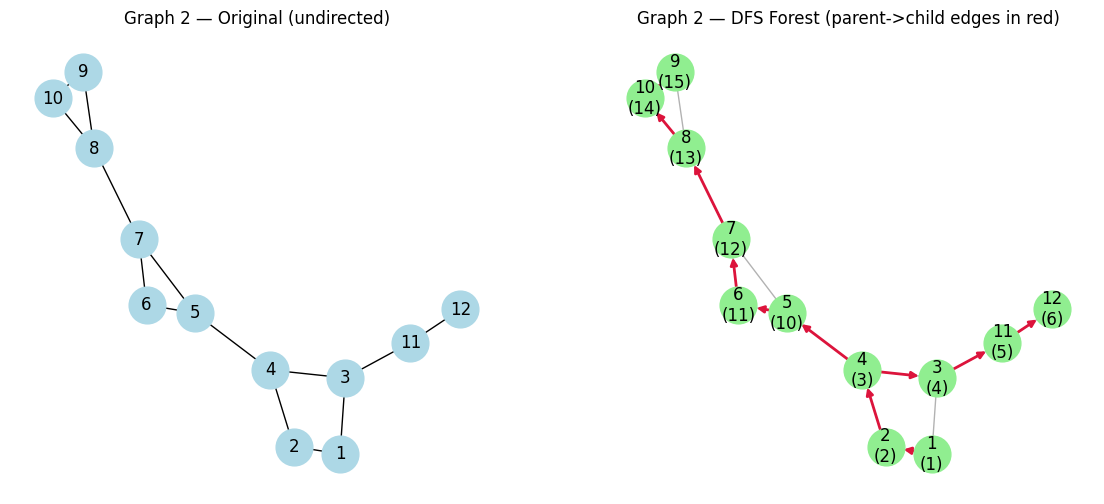

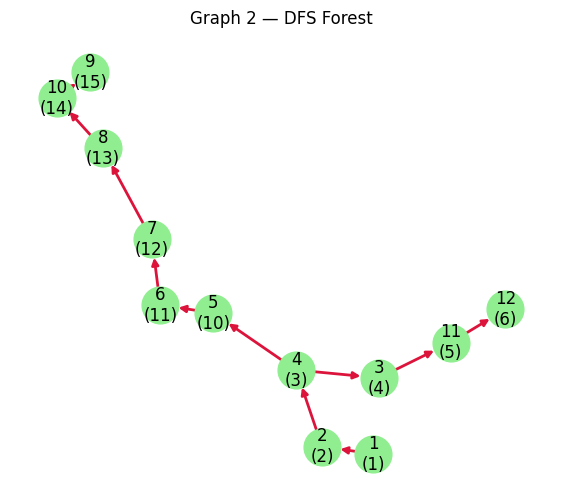

In [20]:
# Constructie Graph 2 (undirected)
G2 = nx.Graph()
nodes2 = list(range(1,13))
G2.add_nodes_from(nodes2)
edges2 = [
    (1,2),(1,3),(2,4),(3,4), # kleine vierhoek
    (4,5),(5,6),(6,7),(5,7), # brug/cyclus
    (7,8),(8,9),(9,10),(8,10), # cyclus
    (3,11),(11,12) # hangerende component
]
G2.add_edges_from(edges2)
pos2 = nx.spring_layout(G2, seed=24)

# Full DFS over alle componenten
res2 = full_dfs(G2)
print('Traversal order (Graph 2):', res2['order'])
print('Discovery times:', res2['discovery'])
print('Finish times:', res2['finish'])

# Bouw DFS tree van parent-map (richting parent->child)
tree2 = nx.DiGraph()
tree2.add_nodes_from(G2.nodes())
for child, par in res2['parent'].items():
    if par is not None:
        tree2.add_edge(par, child)

fig, axes = plt.subplots(1,2, figsize=(14,6))
# Original undirected graph
ax = axes[0]
nx.draw(G2, pos2, ax=ax, with_labels=True, node_color='lightblue', node_size=700)
ax.set_title('Graph 2 — Original (undirected)')
# DFS forest (directed edges from parent->child)
ax = axes[1]
nx.draw(G2, pos2, ax=ax, with_labels=False, node_color='lightgrey', alpha=0.3)
# Draw DFS forest on top without automatic labels to avoid duplication
nx.draw(tree2, pos2, ax=ax, with_labels=False, node_color='lightgreen', edge_color='crimson', arrows=True, width=2, node_size=700)
# annotate with discovery times
labels2 = {n: f'{n}\n({res2["discovery"].get(n, "")})' for n in tree2.nodes()}
nx.draw_networkx_labels(tree2, pos2, labels=labels2, ax=ax)
ax.set_title('Graph 2 — DFS Forest (parent->child edges in red)')

# Save tree-only PNG
fig_tree2, ax_tree2 = plt.subplots(figsize=(7,6))
nx.draw(tree2, pos2, ax=ax_tree2, with_labels=False, node_color='lightgreen', edge_color='crimson', arrows=True, width=2, node_size=700)
nx.draw_networkx_labels(tree2, pos2, labels=labels2, ax=ax_tree2)
ax_tree2.set_title('Graph 2 — DFS Forest')
fig_tree2.savefig(r'graph2_dfs_forest.png', dpi=200, bbox_inches='tight')

plt.show()

## Conclusie en verificatie
- De `order`, `parent`, `discovery` en `finish` structuren worden afgedrukt en gebruikt om de search trees op te bouwen.
- In de plots zijn de DFS-tree-edges rood gekleurd en tonen ze de boomstructuur die voortkomt uit de DFS doorzoeking.
- Voor Graph 1 is DFS vanaf `A` getoond; voor Graph 2 is een volledige DFS (alle componenten) getoond.
